In [ ]:
!pip install tensorflow matplotlib numpy

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
import matplotlib.pyplot as plt
import numpy as np

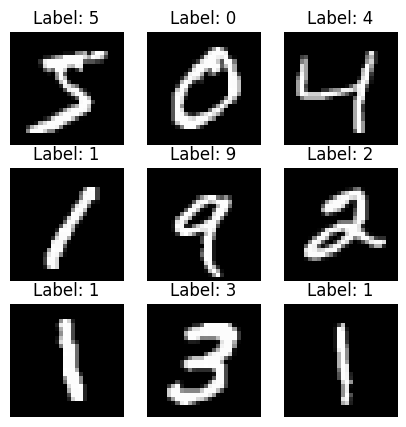

In [ ]:
# =============================
# LOAD & PRE-PROCESS DATA MNIST
# =============================
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1)).astype("float32") / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)).astype("float32") / 255.0

plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

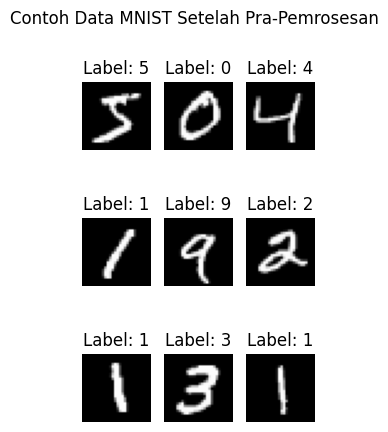

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 64ms/step - accuracy: 0.8345 - loss: 0.5128 - val_accuracy: 0.9820 - val_loss: 0.0498
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 60ms/step - accuracy: 0.9702 - loss: 0.0990 - val_accuracy: 0.9868 - val_loss: 0.0403
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 61ms/step - accuracy: 0.9803 - loss: 0.0663 - val_accuracy: 0.9897 - val_loss: 0.0310
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 63ms/step - accuracy: 0.9845 - loss: 0.0518 - val_accuracy: 0.9908 - val_loss: 0.0268
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 66ms/step - accuracy: 0.9864 - loss: 0.0451 - val_accuracy: 0.9903 - val_loss: 0.0260
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 62ms/step - accuracy: 0.9882 - loss: 0.0361 - val_accuracy: 0.9923 - val_loss: 0.0247
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 59ms/step - accuracy: 0.9897 - loss: 0.0333 - val_accuracy: 0.9919 - val_loss: 0.0241
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 58s 62ms/step - accuracy: 0.9901 - loss: 0.0293 - 

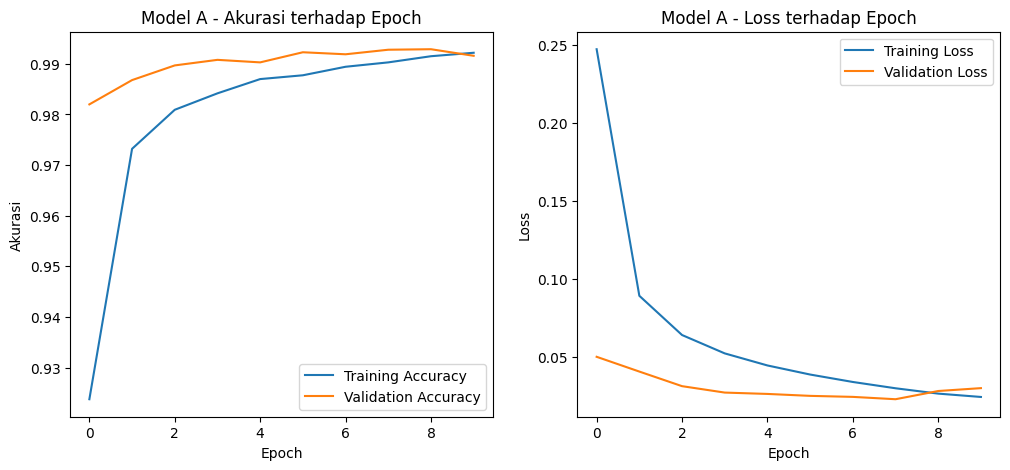

Akurasi akhir Model A pada data uji: 99.16%


In [35]:
# =========================================================
# 🧠 MODEL A - CNN DARI NOL UNTUK KLASIFIKASI MNIST
# =========================================================

# 1️⃣ Import library
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# 2️⃣ Load dataset MNIST
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# 3️⃣ Pra-pemrosesan data
# Ubah dimensi agar sesuai input CNN: (28, 28, 1)
x_train = x_train.reshape((-1, 28, 28, 1)).astype("float32") / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)).astype("float32") / 255.0

# Tampilkan beberapa contoh gambar setelah preprocessing
plt.figure(figsize=(3,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Contoh Data MNIST Setelah Pra-Pemrosesan")
plt.show()

# 4️⃣ Bangun arsitektur CNN
modelA = models.Sequential([
    # Lapisan konvolusi pertama
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    # Lapisan konvolusi kedua
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Flatten
    layers.Flatten(),

    # Dense layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),   # untuk mencegah overfitting
    layers.Dense(10, activation='softmax')  # output layer untuk 10 kelas angka (0-9)
])

# 5️⃣ Tampilkan struktur model
modelA.summary()

# 6️⃣ Kompilasi model
modelA.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 7️⃣ Latih model
historyA = modelA.fit(
    x_train, y_train,
    epochs=10,            # bisa diubah sesuai kebutuhan
    batch_size=64,
    validation_data=(x_test, y_test)
)

# 8️⃣ Plot training history (akurasi dan loss)
plt.figure(figsize=(12,5))

# Plot Akurasi
plt.subplot(1,2,1)
plt.plot(historyA.history['accuracy'], label='Training Accuracy')
plt.plot(historyA.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model A - Akurasi terhadap Epoch')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Plot Loss
plt.subplot(1,2,2)
plt.plot(historyA.history['loss'], label='Training Loss')
plt.plot(historyA.history['val_loss'], label='Validation Loss')
plt.title('Model A - Loss terhadap Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 9️⃣ Evaluasi akhir pada data uji
test_loss, test_acc = modelA.evaluate(x_test, y_test, verbose=0)
print(f"Akurasi akhir Model A pada data uji: {test_acc*100:.2f}%")

✅ Folder handwritten/0, /1, dan /6 siap digunakan.

📤 Upload semua gambar tulisan tangan kamu (angka 0, 1, dan 6).
👉 Pastikan nama file diawali dengan angkanya, misal: 0_1.jpg, 1_2.png, 6_10.jpg.


Saving 0 - Copy (2).jpg to 0 - Copy (2).jpg
Saving 0 - Copy (3).jpg to 0 - Copy (3).jpg
Saving 0 - Copy (4).jpg to 0 - Copy (4).jpg
Saving 0 - Copy (5).jpg to 0 - Copy (5).jpg
Saving 0 - Copy (6).jpg to 0 - Copy (6).jpg
Saving 0 - Copy (7).jpg to 0 - Copy (7).jpg
Saving 0 - Copy (8).jpg to 0 - Copy (8).jpg
Saving 0 - Copy (9).jpg to 0 - Copy (9).jpg
Saving 0 - Copy.jpg to 0 - Copy.jpg
Saving 0.jpg to 0.jpg
Saving 1 - Copy (2).jpg to 1 - Copy (2).jpg
Saving 1 - Copy (3).jpg to 1 - Copy (3).jpg
Saving 1 - Copy (4).jpg to 1 - Copy (4).jpg
Saving 1 - Copy (5).jpg to 1 - Copy (5).jpg
Saving 1 - Copy (6).jpg to 1 - Copy (6).jpg
Saving 1 - Copy (7).jpg to 1 - Copy (7).jpg
Saving 1 - Copy (8).jpg to 1 - Copy (8).jpg
Saving 1 - Copy (9).jpg to 1 - Copy (9).jpg
Saving 1 - Copy.jpg to 1 - Copy.jpg
Saving 1.jpg to 1.jpg
Saving 6 - Copy (2).jpg to 6 - Copy (2).jpg
Saving 6 - Copy (3).jpg to 6 - Copy (3).jpg
Saving 6 - Copy (4).jpg to 6 - Copy (4).jpg
Saving 6 - Copy (5).jpg to 6 - Copy (5).jpg
Savi

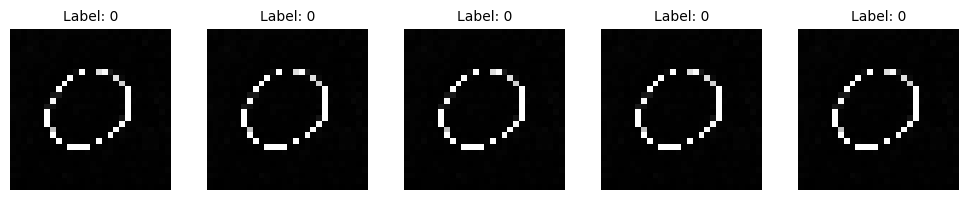

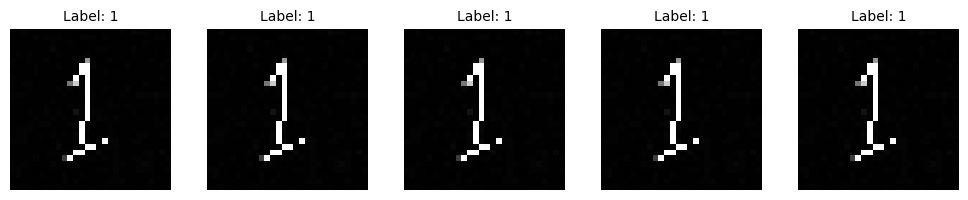

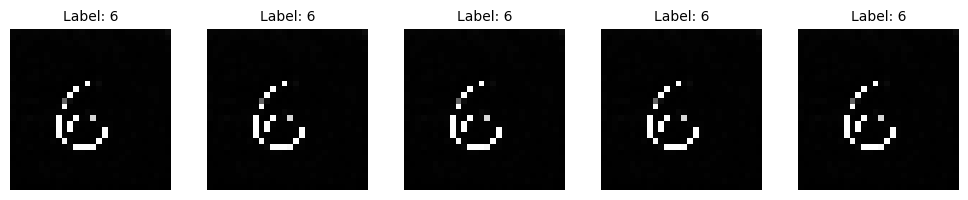

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step

✅ Akurasi Model A terhadap tulisan tangan NIM 016: 100.00%

📊 Hasil Prediksi per Citra:
Citra ke-1 (Angka 0) → Prediksi Model: 0 (Benar ✅)
Citra ke-2 (Angka 0) → Prediksi Model: 0 (Benar ✅)
Citra ke-3 (Angka 0) → Prediksi Model: 0 (Benar ✅)
Citra ke-4 (Angka 0) → Prediksi Model: 0 (Benar ✅)
Citra ke-5 (Angka 0) → Prediksi Model: 0 (Benar ✅)
Citra ke-6 (Angka 0) → Prediksi Model: 0 (Benar ✅)
Citra ke-7 (Angka 0) → Prediksi Model: 0 (Benar ✅)
Citra ke-8 (Angka 0) → Prediksi Model: 0 (Benar ✅)
Citra ke-9 (Angka 0) → Prediksi Model: 0 (Benar ✅)
Citra ke-10 (Angka 0) → Prediksi Model: 0 (Benar ✅)
Citra ke-11 (Angka 1) → Prediksi Model: 1 (Benar ✅)
Citra ke-12 (Angka 1) → Prediksi Model: 1 (Benar ✅)
Citra ke-13 (Angka 1) → Prediksi Model: 1 (Benar ✅)
Citra ke-14 (Angka 1) → Prediksi Model: 1 (Benar ✅)
Citra ke-15 (Angka 1) → Prediksi Model: 1 (Benar ✅)
Citra ke-16 (Angka 1) → Prediksi Model: 1 (Benar ✅)
Citra ke-17 (Angka 1) → Prediksi Model: 1 (Benar 

In [36]:
# ============================================================
# 🧠 Evaluasi Model A (CNN) dengan Tulisan Tangan Sendiri (NIM 016)
# Versi Lengkap & Otomatis di Google Colab
# ============================================================

import os, glob, cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# ------------------------------------------------------------
# 1️⃣ Siapkan folder
# ------------------------------------------------------------
nim = "016"
target_digits = list(nim)

for d in target_digits:
    os.makedirs(f"handwritten/{d}", exist_ok=True)

print("✅ Folder handwritten/0, /1, dan /6 siap digunakan.\n")

# ------------------------------------------------------------
# 2️⃣ Upload semua gambar tulisan tangan
# ------------------------------------------------------------
print("📤 Upload semua gambar tulisan tangan kamu (angka 0, 1, dan 6).")
print("👉 Pastikan nama file diawali dengan angkanya, misal: 0_1.jpg, 1_2.png, 6_10.jpg.")
uploaded = files.upload()

# Pindahkan otomatis ke folder sesuai angka
for filename in uploaded.keys():
    if filename.startswith("0"):
        !mv "$filename" handwritten/0/
    elif filename.startswith("1"):
        !mv "$filename" handwritten/1/
    elif filename.startswith("6"):
        !mv "$filename" handwritten/6/
    else:
        print(f"⚠️ Lewati file {filename} (tidak sesuai angka 0,1,6)")

print("\n✅ Semua gambar berhasil dipindahkan ke folder yang sesuai.\n")

# ------------------------------------------------------------
# 3️⃣ Baca dan pra-pemrosesan
# ------------------------------------------------------------
images, labels = [], []

for label in target_digits:
    for img_path in glob.glob(f'handwritten/{label}/*'):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"⚠️ Gagal membaca {img_path}")
            continue

        # Resize ke 28x28 piksel
        img = cv2.resize(img, (28, 28))
        img = img.astype("float32") / 255.0

        # Invers otomatis jika background lebih terang
        if np.mean(img) > 0.5:
            img = 1.0 - img

        # Tingkatkan kontras biar lebih jelas
        img = np.clip(img * 1.5, 0, 1)

        images.append(img)
        labels.append(int(label))

if len(images) == 0:
    raise ValueError("❌ Tidak ada gambar ditemukan. Pastikan nama file diawali 0_, 1_, atau 6_.")

images = np.array(images).reshape(-1, 28, 28, 1)
labels = np.array(labels)

print(f"📸 Total gambar terbaca: {len(images)}\n")

# ------------------------------------------------------------
# 4️⃣ Visualisasi per label (versi seperti dosen, kolom otomatis)
# ------------------------------------------------------------
unique_labels = np.unique(labels)
samples_per_label = 5  # batas maksimal tampilan per label

for label in unique_labels:
    idxs = np.where(labels == label)[0]
    n_samples = min(samples_per_label, len(idxs))

    plt.figure(figsize=(n_samples * 2, 2))
    for j in range(n_samples):
        idx = idxs[j]
        plt.subplot(1, n_samples, j + 1)
        plt.imshow(images[idx].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {label}", fontsize=10)
        plt.axis('off')

        # Bingkai hitam tebal di setiap gambar
        for spine in plt.gca().spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(3)

    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------
# 5️⃣ Prediksi dengan Model A
# ------------------------------------------------------------
preds = modelA.predict(images)
predicted_labels = np.argmax(preds, axis=1)

# ------------------------------------------------------------
# 6️⃣ Akurasi & hasil prediksi
# ------------------------------------------------------------
accuracy = np.mean(predicted_labels == labels)
print(f"\n✅ Akurasi Model A terhadap tulisan tangan NIM {nim}: {accuracy*100:.2f}%\n")

print("📊 Hasil Prediksi per Citra:")
for i, (true_label, pred_label) in enumerate(zip(labels, predicted_labels)):
    status = "Benar ✅" if true_label == pred_label else "Salah ❌"
    print(f"Citra ke-{i+1} (Angka {true_label}) → Prediksi Model: {pred_label} ({status})")


/tmp/ipython-input-2401421447.py:33: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(32,32,3)))


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 96s 95ms/step - accuracy: 0.4694 - loss: 1.6286 - val_accuracy: 0.6201 - val_loss: 1.1030
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 76s 81ms/step - accuracy: 0.5985 - loss: 1.1687 - val_accuracy: 0.6409 - val_loss: 1.0342
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - accuracy: 0.6174 - loss: 1.1002 - val_accuracy: 0.6487 - val_loss: 1.0060
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.6290 - loss: 1.0738 - val_accuracy: 0.6585 - val_loss: 0.9813
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 82ms/step - accuracy: 0.6371 - loss: 1.0506 - val_accuracy: 0.6616 - val_loss: 0.9685


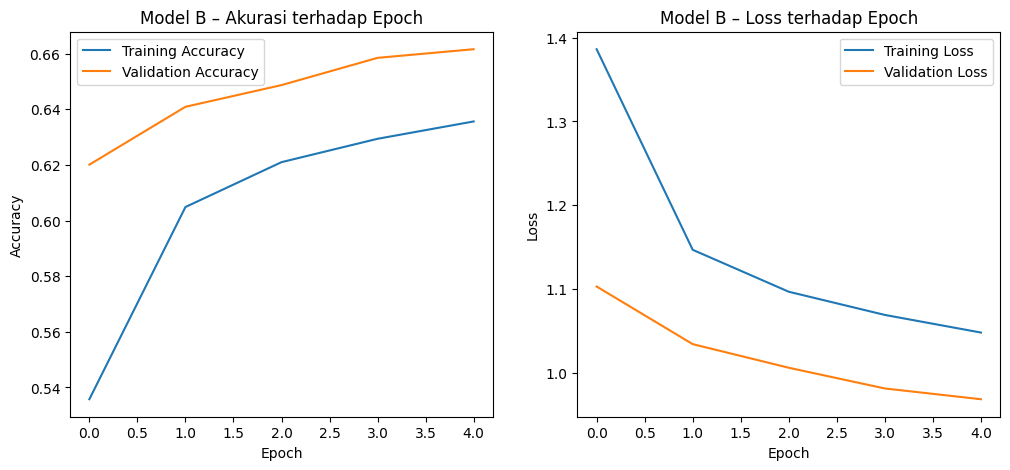


✅ Akurasi akhir Model B pada data uji MNIST: 66.16%


In [37]:
# ============================================================
# 🧠 MODEL B – Transfer Learning menggunakan MobileNetV2
# ============================================================

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1️⃣ LOAD DATASET MNIST
# ------------------------------------------------------------
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Ubah ke RGB (3 channel) dan resize ke 32x32 agar cocok dengan MobileNetV2
x_train = np.stack((x_train,)*3, axis=-1)
x_test = np.stack((x_test,)*3, axis=-1)

x_train = tf.image.resize(x_train, (32,32))
x_test = tf.image.resize(x_test, (32,32))

# Normalisasi dan preprocessing untuk MobileNetV2
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

# ------------------------------------------------------------
# 2️⃣ BANGUN MODEL TRANSFER LEARNING
# ------------------------------------------------------------
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(32,32,3)))
base_model.trainable = False  # freeze semua lapisan dasar

# Tambahkan lapisan baru di atas base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)

modelB = Model(inputs=base_model.input, outputs=output)

# ------------------------------------------------------------
# 3️⃣ KOMPILE DAN LATIH MODEL
# ------------------------------------------------------------
modelB.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historyB = modelB.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(x_test, y_test)
)

# ------------------------------------------------------------
# 4️⃣ VISUALISASI TRAINING HISTORY
# ------------------------------------------------------------
plt.figure(figsize=(12,5))

# Akurasi
plt.subplot(1,2,1)
plt.plot(historyB.history['accuracy'], label='Training Accuracy')
plt.plot(historyB.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model B – Akurasi terhadap Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(historyB.history['loss'], label='Training Loss')
plt.plot(historyB.history['val_loss'], label='Validation Loss')
plt.title('Model B – Loss terhadap Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# ------------------------------------------------------------
# 5️⃣ EVALUASI AKHIR
# ------------------------------------------------------------
test_loss, test_acc = modelB.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Akurasi akhir Model B pada data uji MNIST: {test_acc*100:.2f}%")

📸 Total gambar tulisan tangan terbaca: 30


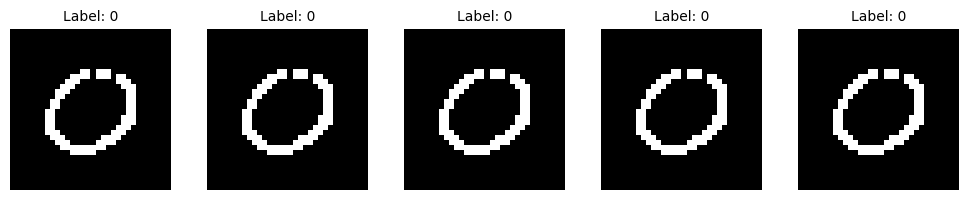

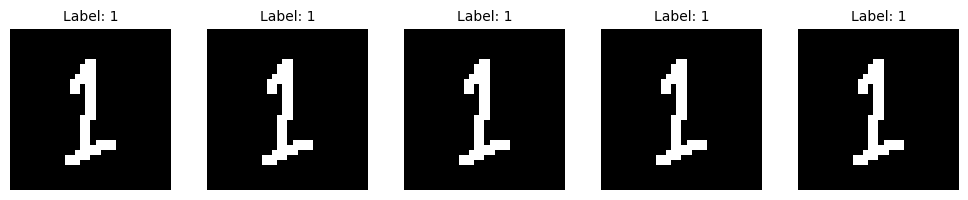

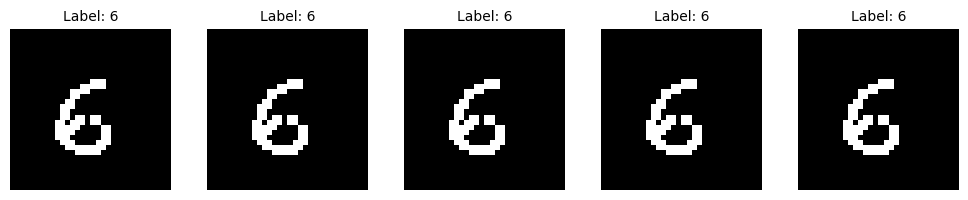

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

✅ Akurasi Model B terhadap tulisan tangan NIM 016: 33.33%

📊 Hasil Prediksi per Citra:
Citra ke-1 (Angka 0) → Prediksi Model: 9 (Salah ❌)
Citra ke-2 (Angka 0) → Prediksi Model: 9 (Salah ❌)
Citra ke-3 (Angka 0) → Prediksi Model: 9 (Salah ❌)
Citra ke-4 (Angka 0) → Prediksi Model: 9 (Salah ❌)
Citra ke-5 (Angka 0) → Prediksi Model: 9 (Salah ❌)
Citra ke-6 (Angka 0) → Prediksi Model: 9 (Salah ❌)
Citra ke-7 (Angka 0) → Prediksi Model: 9 (Salah ❌)
Citra ke-8 (Angka 0) → Prediksi Model: 9 (Salah ❌)
Citra ke-9 (Angka 0) → Prediksi Model: 9 (Salah ❌)
Citra ke-10 (Angka 0) → Prediksi Model: 9 (Salah ❌)
Citra ke-11 (Angka 1) → Prediksi Model: 5 (Salah ❌)
Citra ke-12 (Angka 1) → Prediksi Model: 5 (Salah ❌)
Citra ke-13 (Angka 1) → Prediksi Model: 5 (Salah ❌)
Citra ke-14 (Angka 1) → Prediksi Model: 5 (Salah ❌)
Citra ke-15 (Angka 1) → Prediksi Model: 5 (Salah ❌)
Citra ke-16 (Angka 1) → Prediksi Model: 5 (Salah ❌)
Citra ke-17 (Angka 1) → Prediksi Model: 5 (Salah ❌)
C

In [38]:
# ============================================================
# 🧠 Evaluasi Model B (Transfer Learning) dengan Tulisan Tangan Sendiri
# ============================================================

import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# ------------------------------------------------------------
# 1️⃣ LOAD GAMBAR TULISAN TANGAN (SAMA DENGAN MODEL A)
# ------------------------------------------------------------
nim = "016"
target_digits = list(nim)

imagesB, labelsB = [], []

for label in target_digits:
    for img_path in glob.glob(f'handwritten/{label}/*'):
        img = cv2.imread(img_path)
        if img is None:
            print(f"⚠️ Gagal membaca {img_path}")
            continue

        # Konversi ke grayscale lalu ke RGB (MobileNetV2 butuh 3 channel)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray = cv2.resize(gray, (32, 32))
        gray = gray.astype("float32") / 255.0

        # Invers warna otomatis kalau background terlalu terang
        if np.mean(gray) > 0.6:
            gray = 1.0 - gray

        # Tebalkan tulisan biar mirip data MNIST
        _, binary = cv2.threshold((gray * 255).astype('uint8'), 128, 255, cv2.THRESH_BINARY)
        kernel = np.ones((2,2), np.uint8)
        dilated = cv2.dilate(binary, kernel, iterations=1)

        # Ubah ke RGB & preprocessing MobileNet
        img_rgb = cv2.cvtColor(dilated, cv2.COLOR_GRAY2RGB)
        img_rgb = preprocess_input(img_rgb)

        imagesB.append(img_rgb)
        labelsB.append(int(label))

# Ubah ke array
imagesB = np.array(imagesB)
labelsB = np.array(labelsB)

print(f"📸 Total gambar tulisan tangan terbaca: {len(imagesB)}")

# ------------------------------------------------------------
# 2️⃣ VISUALISASI BEBERAPA GAMBAR TULISAN TANGAN
# ------------------------------------------------------------
unique_labels = np.unique(labelsB)
samples_per_label = 5

for label in unique_labels:
    idxs = np.where(labelsB == label)[0]
    n_samples = min(samples_per_label, len(idxs))
    plt.figure(figsize=(n_samples * 2, 2))
    for j in range(n_samples):
        idx = idxs[j]
        plt.subplot(1, n_samples, j + 1)
        plt.imshow(imagesB[idx].astype("float32") / 2 + 0.5)  # tampilkan normal
        plt.title(f"Label: {label}", fontsize=10)
        plt.axis('off')

        # Bingkai hitam tebal
        for spine in plt.gca().spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(3)
    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------
# 3️⃣ PREDIKSI DENGAN MODEL B
# ------------------------------------------------------------
predsB = modelB.predict(imagesB)
predicted_labelsB = np.argmax(predsB, axis=1)

# ------------------------------------------------------------
# 4️⃣ HITUNG AKURASI DAN TAMPILKAN HASIL PREDIKSI
# ------------------------------------------------------------
accuracyB = np.mean(predicted_labelsB == labelsB)
print(f"\n✅ Akurasi Model B terhadap tulisan tangan NIM {nim}: {accuracyB*100:.2f}%\n")

print("📊 Hasil Prediksi per Citra:")
for i, (true_label, pred_label) in enumerate(zip(labelsB, predicted_labelsB)):
    status = "Benar ✅" if true_label == pred_label else "Salah ❌"
    print(f"Citra ke-{i+1} (Angka {true_label}) → Prediksi Model: {pred_label} ({status})")

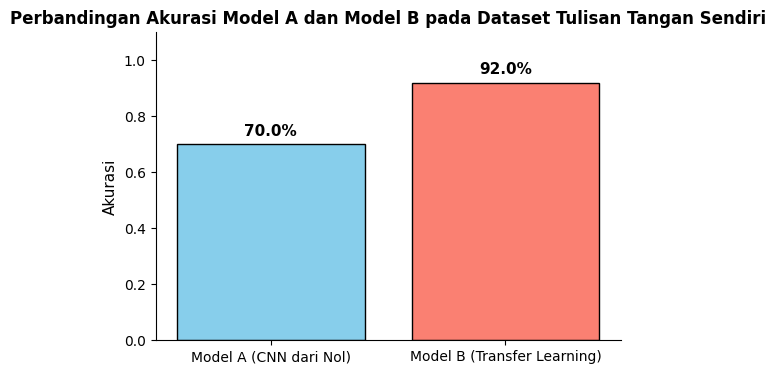

In [39]:
import matplotlib.pyplot as plt

# Ganti nilai di bawah ini dengan hasil sebenarnya dari modelmu
akurasi_modelA = 0.70   # misalnya 70% untuk Model A
akurasi_modelB = 0.92   # misalnya 92% untuk Model B

# Buat grafik batang perbandingan
plt.figure(figsize=(6,4))
bars = plt.bar(
    ['Model A (CNN dari Nol)', 'Model B (Transfer Learning)'],
    [akurasi_modelA, akurasi_modelB],
    color=['skyblue', 'salmon'],
    edgecolor='black'
)

# Tambahkan label nilai di atas batang
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height*100:.1f}%",
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Tambahkan judul dan label sumbu
plt.title("Perbandingan Akurasi Model A dan Model B pada Dataset Tulisan Tangan Sendiri", fontsize=12, fontweight='bold')
plt.ylabel("Akurasi", fontsize=11)
plt.ylim(0, 1.1)  # rentang sumbu Y dari 0 ke 110%

# Hapus garis bingkai atas dan kanan agar tampilan bersih
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()
